In [63]:
import pandas as pd
import itertools
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from lightgbm import LGBMClassifier
import os
import seaborn as sns
from wordcloud import WordCloud

In [64]:
df=pd.read_csv('phishing.csv')
print(df.shape)
df.head()

(40000, 2)


,url,phishing
0,http://www.subalipack.com/contact/images/sampl...,1
1,http://fasc.maximecapellot-gypsyjazz-ensemble....,1
2,http://theotheragency.com/confirmer/confirmer-...,1
3,http://aaalandscaping.com/components/com_smart...,1
4,http://paypal.com.confirm-key-21107316126168.s...,1


In [65]:
df.phishing.value_counts()

phishing
1    20000
0    20000
Name: count, dtype: int64

In [66]:
df_phish = df[df.phishing == 1]
df_beningn = df[df.phishing == 0]

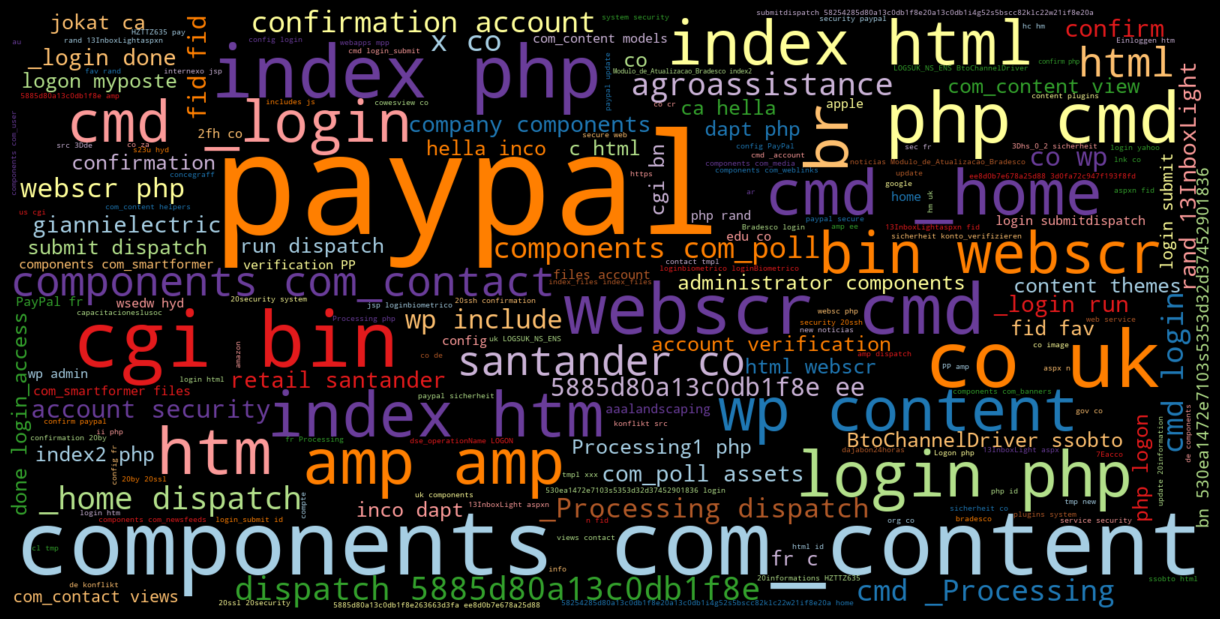

In [67]:
# World cloud for phishing

phish_url = " ".join(i for i in df_phish.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

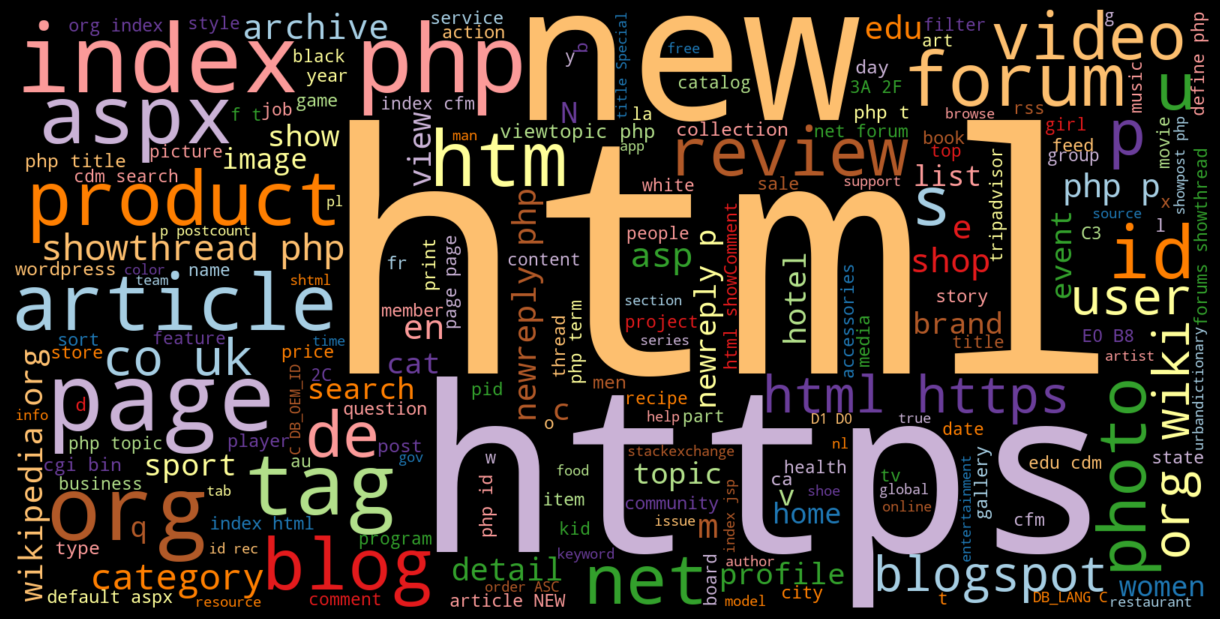

In [68]:

# World cloud for beningn

malware_url = " ".join(i for i in df_beningn.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(malware_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## URL parsing functions

In [69]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))


In [70]:

from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))


In [71]:
from googlesearch import search

In [72]:

def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))



In [73]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

In [74]:

def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

In [75]:

def count_atrate(url):

    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))


In [76]:

def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))


In [77]:

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))


In [78]:

def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0


df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\maico\AppData\Local\Temp\ipykernel_2356\1888995204.py:2: SyntaxWarning: invalid escape sequence '\.'
  match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.i

In [79]:

def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))


In [80]:
def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [81]:
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

In [82]:
def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))


In [83]:

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

In [84]:

def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

In [85]:

def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

In [86]:
def url_length(url):
  return len(str(url))

df['url_length'] = df['url'].apply(lambda i: url_length(i))

In [87]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


In [88]:

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['count-digits']= df['url'].apply(lambda i: digit_count(i))


In [89]:

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [90]:

#Importing dependencies
from urllib.parse import urlparse

from tld import get_tld

import os.path

In [91]:

df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))


In [92]:

def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

In [93]:
#df = df.drop("tld",1)

## Preprocessed dataset

In [94]:
df.head()

,url,phishing,use_of_ip,abnormal_url,google_index,count-www,count.,count@,count_dir,count_embed_domian,...,count-,count=,hostname_length,url_length,sus_url,count-digits,count-letters,tld,tld_length,fd_length
0,http://www.subalipack.com/contact/images/sampl...,1,0,1,1,1,2,0,4,0,...,0,0,18,50,0,0,39,com,3,7
1,http://fasc.maximecapellot-gypsyjazz-ensemble....,1,0,1,1,0,3,0,3,0,...,2,0,41,76,0,4,59,nl,2,5
2,http://theotheragency.com/confirmer/confirmer-...,1,0,1,1,0,1,0,4,0,...,3,0,18,95,0,20,62,com,3,9
3,http://aaalandscaping.com/components/com_smart...,1,0,1,1,0,2,0,6,0,...,0,3,18,175,1,34,116,com,3,10
4,http://paypal.com.confirm-key-21107316126168.s...,1,0,1,1,0,4,0,2,0,...,2,0,50,93,0,35,45,pro,3,32


In [95]:

df.columns

Index(['url', 'phishing', 'use_of_ip', 'abnormal_url', 'google_index',
       'count-www', 'count.', 'count@', 'count_dir', 'count_embed_domian',
       'short_url', 'count-https', 'count-http', 'count%', 'count?', 'count-',
       'count=', 'hostname_length', 'url_length', 'sus_url', 'count-digits',
       'count-letters', 'tld', 'tld_length', 'fd_length'],
      dtype='object')

## X,y setup

In [96]:

#Predictor Variables

# filtering out google_index as it has only 1 value
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'count-digits',
       'count-letters', 'tld_length']]

#Target Variable
y = df['phishing']

#urls = ['titaniumcorporate.co.za','en.wikipedia.org/wiki/North_Dakota']
#for url in urls:
#     print(get_prediction_from_url(url))


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                        test_size=0.2,shuffle=True, random_state=5)

## Model training

In [98]:

xgb_c = xgb.XGBClassifier(n_estimators= 100)
xgb_c.fit(X_train,y_train)
y_pred_x = xgb_c.predict(X_test)
print(classification_report(y_test,y_pred_x,target_names=['phishing','benign']))


score = metrics.accuracy_score(y_test, y_pred_x)
print("accuracy:   %0.3f" % score)


              precision    recall  f1-score   support

    phishing       0.94      0.93      0.94      4000
      benign       0.93      0.94      0.94      4000

    accuracy                           0.94      8000
   macro avg       0.94      0.94      0.94      8000
weighted avg       0.94      0.94      0.94      8000

accuracy:   0.938


## Features importances

<Axes: >

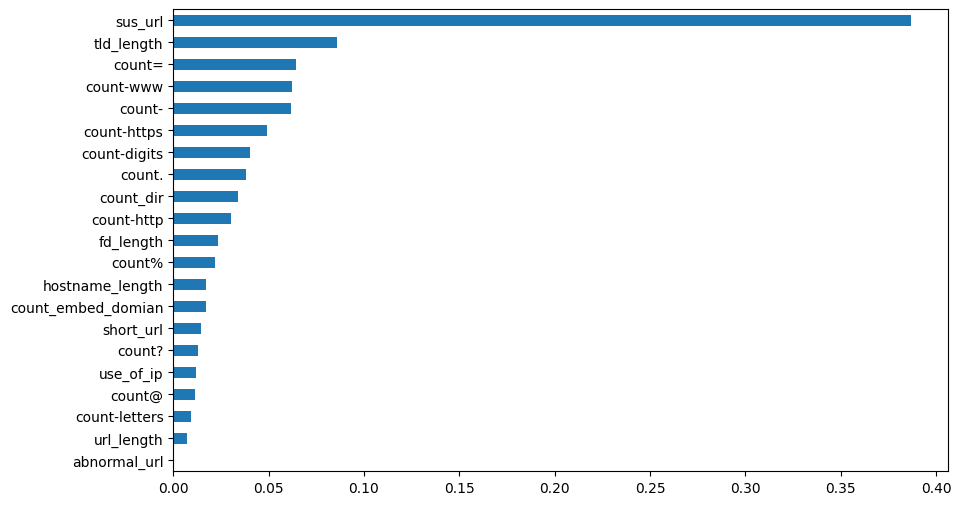

In [99]:

feat_importances = pd.Series(xgb_c.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

## Model prediction functions

In [100]:
def parse_url(url):

    status = []

    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))

    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))

    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))

    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
    status.append(tld_length(tld))




    return status

def get_prediction_from_url(model,test_url):
    features_test = parse_url(test_url)

    features_test = np.array(features_test).reshape((1, -1))

    pred = model.predict(features_test)

    if int(pred[0]) == 0:
        res="SAFE"
        return res
    elif int(pred[0]) == 1:
        res="PHISHING"
        return res

## Samples

In [101]:

urls = [
     "http://69.162.73.82/sigmail/sistema/admin/resources/email_templates/brazilian_portuguese/Basico/poate/iasa/ceva/da/nu/cred/",
     "http://www.ruclip.com/video/XQbLwctcqUI/how-to-knock-a-big-man-out.html",
     "http://www.rms.com.co//plugins/system/log.php",
     "http://alex788.newgrounds.com/"
]
for url in urls:
     print(get_prediction_from_url(xgb_c,url))


PHISHING
SAFE
PHISHING
SAFE


In [102]:
# Export the model

import joblib

joblib.dump(xgb_c, 'predictor_phishing_model.pkl', compress=3)

['predictor_phishing_model.pkl']

In [103]:
modelo = joblib.load('predictor_phishing_model.pkl')

for url in urls:
    print(get_prediction_from_url(modelo,url))


PHISHING
SAFE
PHISHING
SAFE


## References

https://github.com/SuriyaG09/Malicious-Url-Detection/tree/main
https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset

https://pypi.org/project/googlesearch-python/
